In [3]:
!pip install pathway bokeh --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
import pathway as pw
import bokeh.plotting
import panel as pn

# **Step 1: Loading Data And Analysis**

In [33]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Summer Analytics 2025/Final Capstone Project/dataset.csv")
df.head()

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00


In [6]:
# View the shape of the data.
df.shape

(18368, 12)

In [7]:
# View Data types of each feature in the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18368 entries, 0 to 18367
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      18368 non-null  int64  
 1   SystemCodeNumber        18368 non-null  object 
 2   Capacity                18368 non-null  int64  
 3   Latitude                18368 non-null  float64
 4   Longitude               18368 non-null  float64
 5   Occupancy               18368 non-null  int64  
 6   VehicleType             18368 non-null  object 
 7   TrafficConditionNearby  18368 non-null  object 
 8   QueueLength             18368 non-null  int64  
 9   IsSpecialDay            18368 non-null  int64  
 10  LastUpdatedDate         18368 non-null  object 
 11  LastUpdatedTime         18368 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


In [8]:
# Check for missing values in each feature of dataset.
df.isnull().sum()

,0
ID,0
SystemCodeNumber,0
Capacity,0
Latitude,0
Longitude,0
Occupancy,0
VehicleType,0
TrafficConditionNearby,0
QueueLength,0
IsSpecialDay,0


<Axes: >

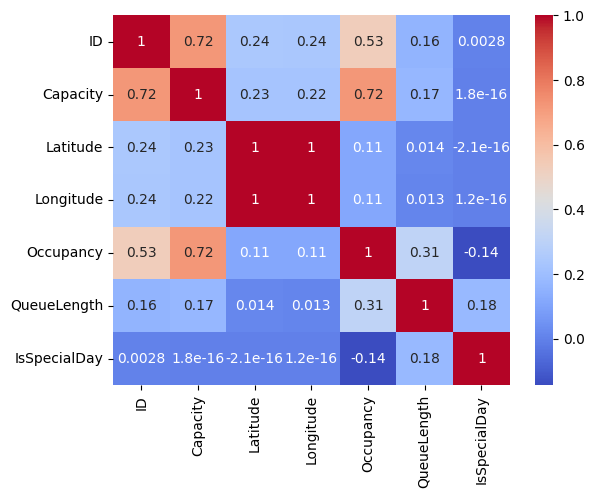

In [9]:
# See the corelations of features with each other.
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

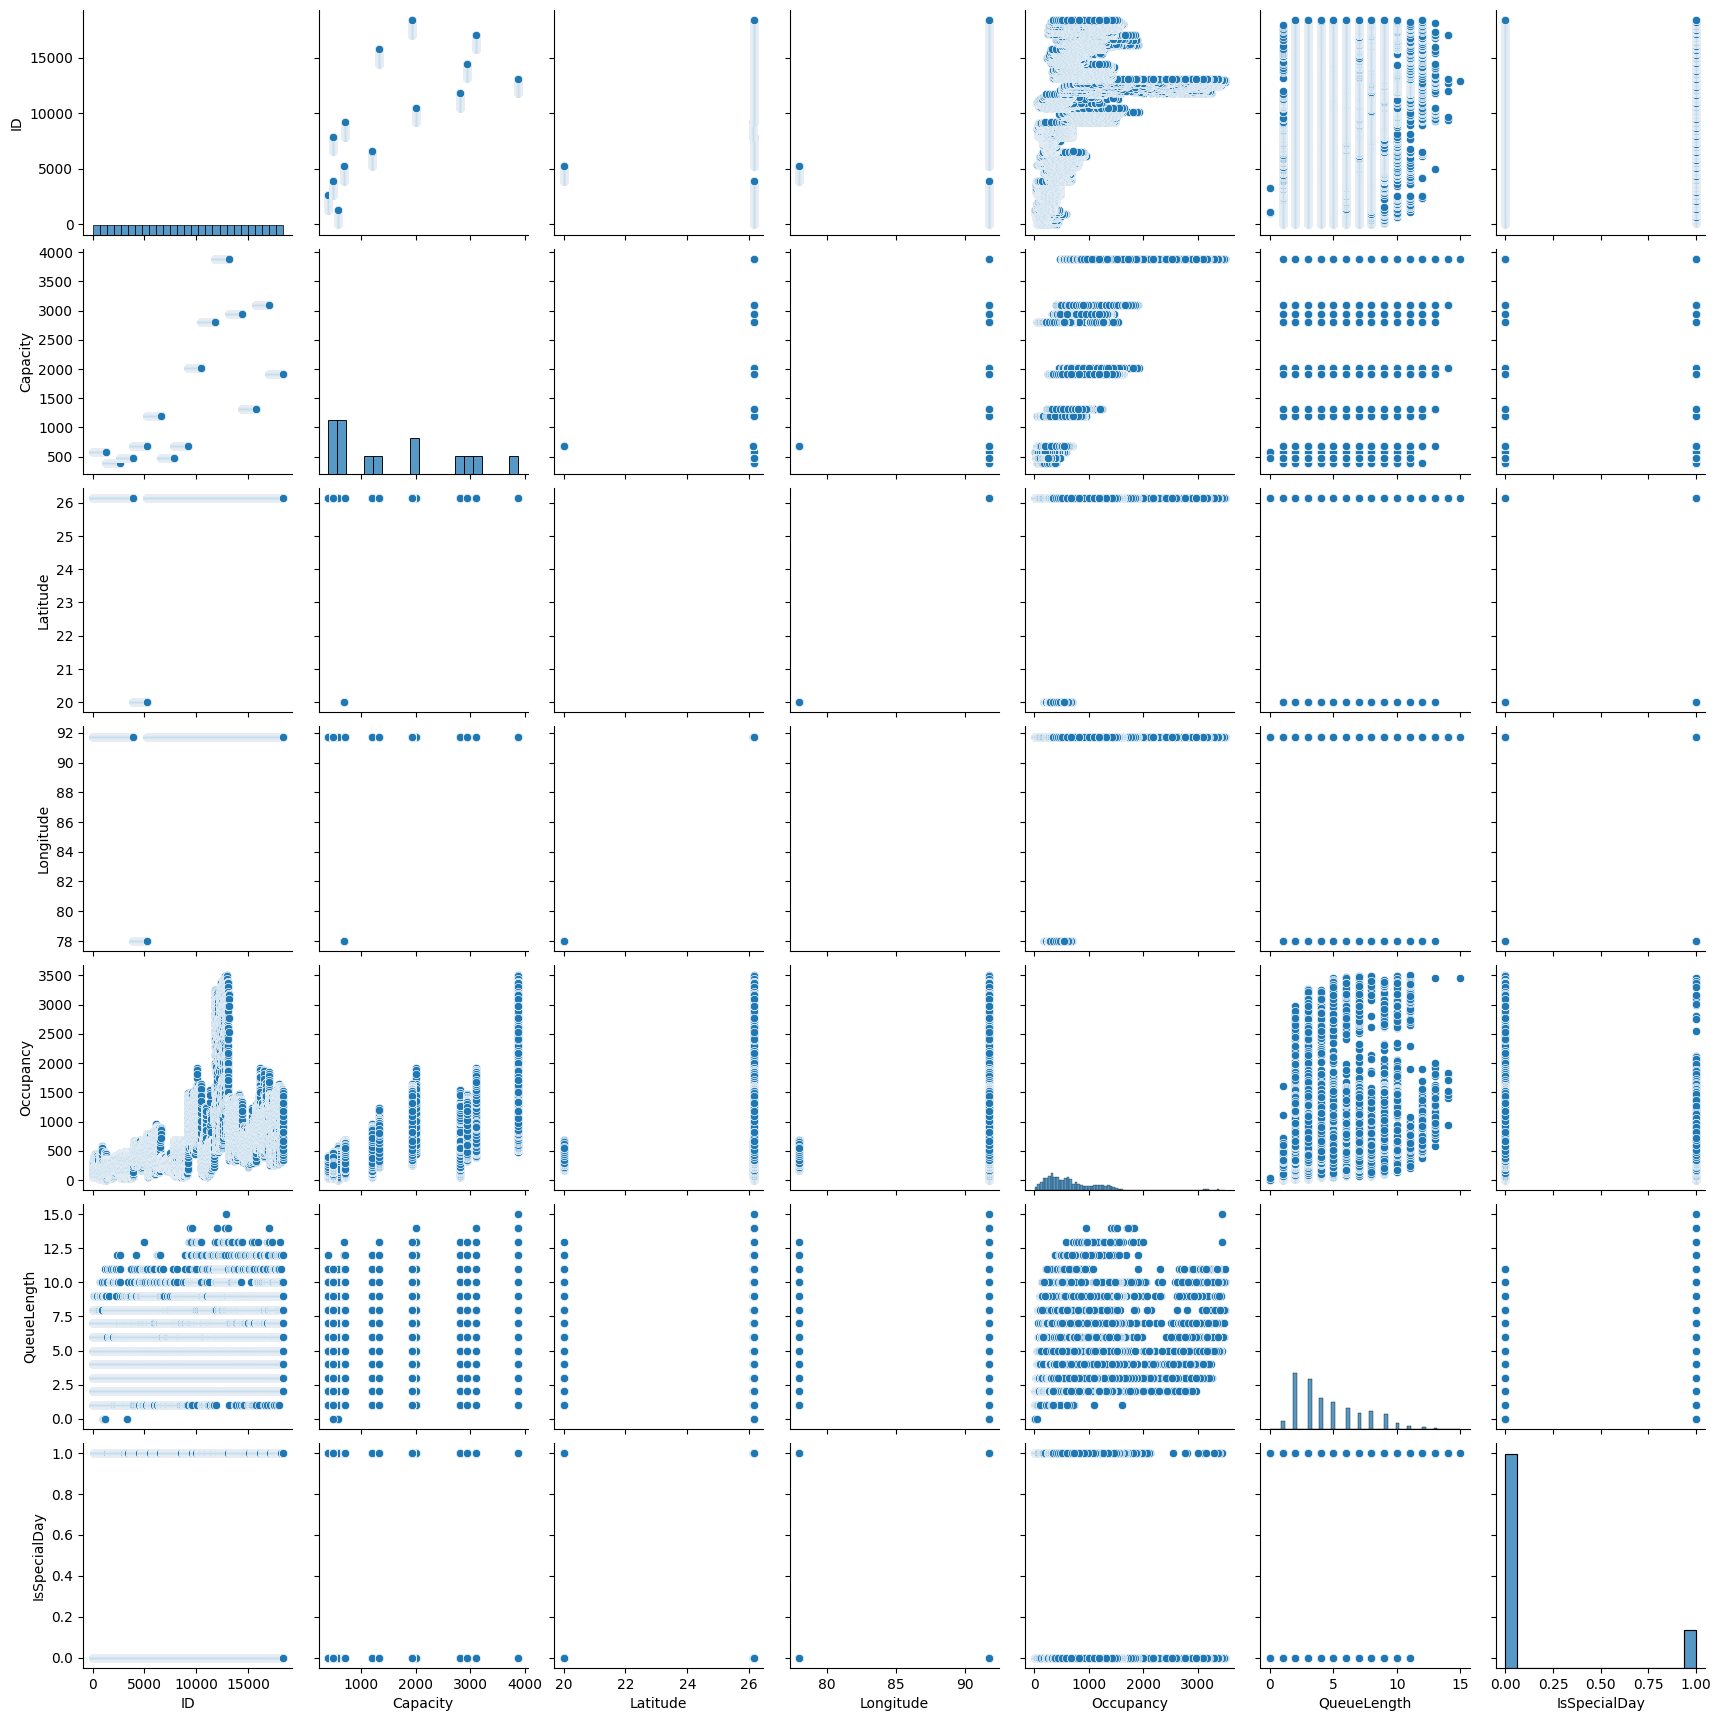

In [ ]:
sns.pairplot(df)

# **Step 2: Data Preprocessing**

In [34]:
# Combine date and time into a single Timestamp and sort chronologically
df['Timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
                                  format='%d-%m-%Y %H:%M:%S')

# Sort the DataFrame by the new 'Timestamp' column and reset the index
df = df.sort_values('Timestamp').reset_index(drop=True)

# Select relevant features for streaming and modeling
features = ['Timestamp', 'SystemCodeNumber', 'Occupancy','Capacity','QueueLength',
            'TrafficConditionNearby','IsSpecialDay','VehicleType',
            'Latitude','Longitude']
df_selected = df[features].copy()

# Save the processed data to CSV for later use
df_selected.to_csv('processed_parking.csv', index=False)

# Show the first few rows
df_selected.head(3)

,Timestamp,SystemCodeNumber,Occupancy,Capacity,QueueLength,TrafficConditionNearby,IsSpecialDay,VehicleType,Latitude,Longitude
0,2016-10-04 07:59:00,BHMBCCMKT01,61,577,1,low,0,car,26.144536,91.736172
1,2016-10-04 07:59:00,BHMNCPHST01,237,1200,2,low,0,bike,26.140014,91.731000
2,2016-10-04 07:59:00,BHMMBMMBX01,264,687,2,low,0,car,20.000035,78.000003


# **Step 3: Model 1- Baseline Linear (Occupancy-Based)**

In [35]:
df_model = df_selected.copy()
df_model['OccupancyRate'] = df_model['Occupancy'] / df_model['Capacity']

# Compute Model 1 price
df_model['price_model1'] = 10 * (1 + 0.5 * df_model['OccupancyRate'])
df_model['price_model1'] = df_model['price_model1'].clip(lower=5, upper=20)

# **Step 4: Model 2- Demand-Based Multi-Factor**

In [36]:
# Normalize queue length (assuming max observed or a fixed cap, here use max of data)
queue_max = df_model['QueueLength'].max() or 1
df_model['QueueNorm'] = df_model['QueueLength'] / queue_max

# Map traffic (example mapping; actual mapping depends on data encoding)
traffic_map = {'Low': 0.8, 'Medium': 1.0, 'High': 1.2}
df_model['TrafficFactor'] = df_model['TrafficConditionNearby'].map(traffic_map).fillna(1.0)

# Map vehicle types (example factors)
veh_map = {'Car': 1.0, 'Bus': 1.5, 'Bike': 0.8}
df_model['VehicleFactor'] = df_model['VehicleType'].map(veh_map).fillna(1.0)

# Special day factor (e.g., +20% on special days)
df_model['SpecialFactor'] = np.where(df_model['IsSpecialDay'], 1.2, 1.0)

# Compute Model 2 price
df_model['price_model2'] = 10 * (
    1
    + 0.4 * df_model['OccupancyRate']
    + 0.3 * df_model['QueueNorm']
    + 0.2 * (df_model['TrafficFactor'] - 1)
    + 0.1 * (df_model['VehicleFactor'] - 1)
    + 0.1 * (df_model['SpecialFactor'] - 1)
)
df_model['price_model2'] = df_model['price_model2'].clip(lower=5, upper=20)


# **Step 5: Model 3- Competitive Adjustment**

## **Build unique lot list & compute neighbors**

In [37]:
# 1) Extract unique lots from your dataset
lots = df_model[['SystemCodeNumber', 'Latitude', 'Longitude']].drop_duplicates().reset_index(drop=True)
lot_ids = lots['SystemCodeNumber'].tolist()
latitudes = lots['Latitude'].values
longitudes = lots['Longitude'].values

# 2) Vectorized haversine distance calculation
def haversine_np(lat1, lon1, lat2, lon2):
    """
    Vectorized haversine distance matrix (returns km).
    """
    R = 6371  # Earth radius in km
    lat1 = np.radians(lat1)[:, None]
    lon1 = np.radians(lon1)[:, None]
    lat2 = np.radians(lat2)[None, :]
    lon2 = np.radians(lon2)[None, :]
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

# Compute pairwise distances
dists_km = haversine_np(latitudes, longitudes, latitudes, longitudes)

# Build neighbors dict: SystemCodeNumber → list of nearby SystemCodeNumbers within 1 km
neighbors_dict = {}
for i, lot in enumerate(lot_ids):
    neighbors = [lot_ids[j] for j in range(len(lot_ids)) if i != j and dists_km[i, j] <= 1.0]
    neighbors_dict[lot] = neighbors

print("Neighbors dictionary created successfully. Example entry:")
print(f"{lot_ids[0]} -> {neighbors_dict[lot_ids[0]]}")


Neighbors dictionary created successfully. Example entry:
BHMBCCMKT01 -> ['BHMNCPHST01', 'BHMNCPNST01', 'Shopping', 'BHMEURBRD01', 'Broad Street', 'Others-CCCPS8', 'Others-CCCPS105a', 'Others-CCCPS119a', 'BHMBCCTHL01', 'Others-CCCPS135a', 'Others-CCCPS202', 'Others-CCCPS98']


## **Competitive pricing and rerouting logic**

In [38]:
def adjust_prices_with_reroute(group):
    """
    Adjust Model 2 prices with competitive logic and suggest rerouting.
    group: df_model subset at one timestamp
    """
    occupancy = dict(zip(group.SystemCodeNumber, group.Occupancy))
    capacity  = dict(zip(group.SystemCodeNumber, group.Capacity))
    price2    = dict(zip(group.SystemCodeNumber, group.price_model2))
    new_prices = []
    reroutes   = []

    for _, row in group.iterrows():
        lot = row.SystemCodeNumber
        own_price = row.price_model2
        comps = neighbors_dict.get(lot, [])
        comp_prices = [price2[c] for c in comps if c in price2]

        # Competitive pricing adjustment:
        if comp_prices and min(comp_prices) < 0.9 * own_price:
            new_price = 0.95 * min(comp_prices)  # undercut cheapest competitor
        else:
            new_price = 1.05 * own_price         # modest bump if we're competitive

        new_price = np.clip(new_price, 5, 20)
        new_prices.append(new_price)

        # Rerouting logic: lot full → suggest cheapest underutilized cheaper neighbor
        reroute_target = None
        if row.Occupancy >= row.Capacity:
            underutilized = [c for c in comps if occupancy.get(c, 0) < 0.8 * capacity.get(c, 1) and price2.get(c, np.inf) < own_price]
            if underutilized:
                reroute_target = min(underutilized, key=lambda c: price2[c])
        reroutes.append(reroute_target)

    out = group.copy()
    out['price_model3'] = new_prices
    out['reroute_to_lot_id'] = reroutes
    return out

# Apply Model 3 adjustments across each timestamp group
df_model3 = df_model.groupby('Timestamp').apply(adjust_prices_with_reroute).reset_index(drop=True)

# Check final results
df_model3[['Timestamp','SystemCodeNumber','price_model2','price_model3','reroute_to_lot_id']].head()


/tmp/ipython-input-38-3265549553.py:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_model3 = df_model.groupby('Timestamp').apply(adjust_prices_with_reroute).reset_index(drop=True)


,Timestamp,SystemCodeNumber,price_model2,price_model3,reroute_to_lot_id
0,2016-10-04 07:59:00,BHMBCCMKT01,10.622877,11.154021,None
1,2016-10-04 07:59:00,BHMNCPHST01,11.190000,11.749500,None
2,2016-10-04 07:59:00,BHMMBMMBX01,11.937118,12.533974,None
3,2016-10-04 07:59:00,BHMNCPNST01,12.453608,9.954360,None
4,2016-10-04 07:59:00,Shopping,11.679167,9.954360,None


# **Step 6: Streaming and Real-Time Simulation**

In [40]:
# Define schema based on our data (assuming CSV has same columns after combining date/time)
schema = pw.schema_from_csv('processed_parking.csv')
processed_parking = pw.demo.replay_csv('processed_parking.csv', schema=schema, input_rate=100)

In [79]:
# Schema inference
schema = pw.schema_from_csv("processed_parking.csv")

# Load CSV
processed_parking = pw.demo.replay_csv("processed_parking.csv", schema=schema, input_rate=10)

# Calculate occupancy rate
price_stream = processed_parking.with_columns(
    OccupancyRate=processed_parking.Occupancy / processed_parking.Capacity,
)

# Compute raw price for Model 1
raw_price1 = 10 * (1 + 0.5 * price_stream.OccupancyRate)
price_model1 = pw.if_else(raw_price1 < 5, 5, pw.if_else(raw_price1 > 20, 20, raw_price1))
price_stream = price_stream.with_columns(price_model1=price_model1)

# Compute factors directly from processed_parking (base table)
traffic_factor = pw.if_else(
    processed_parking.TrafficConditionNearby == "Low", 0.8,
    pw.if_else(processed_parking.TrafficConditionNearby == "Medium", 1.0,
               pw.if_else(processed_parking.TrafficConditionNearby == "High", 1.2, 1.0))
)

vehicle_factor = pw.if_else(
    processed_parking.VehicleType == "Car", 1.0,
    pw.if_else(processed_parking.VehicleType == "Bus", 1.5,
               pw.if_else(processed_parking.VehicleType == "Bike", 0.8, 1.0))
)

special_factor = pw.if_else(processed_parking.IsSpecialDay == 1, 1.2, 1.0)
queue_norm = processed_parking.QueueLength / 10

# Calculate price_model2 factor, keeping everything tied to processed_parking or price_stream
price_model2_factor = (
    1
    + 0.4 * price_stream.OccupancyRate
    + 0.3 * queue_norm
    + 0.2 * (traffic_factor - 1)
    + 0.1 * (vehicle_factor - 1)
    + 0.1 * (special_factor - 1)
)

# Compute clipped price_model2
raw_price2 = 10 * price_model2_factor
price_model2 = pw.if_else(raw_price2 < 5, 5, pw.if_else(raw_price2 > 20, 20, raw_price2))

# Add price_model2 to price_stream
price_stream = price_stream.with_columns(price_model2=price_model2)

# Compute price_model3
price_model3 = pw.if_else(
    price_stream.OccupancyRate > 0.9,
    pw.if_else(price_stream.price_model2 * 1.2 > 20, 20, price_stream.price_model2 * 1.2),
    price_stream.price_model2
)

# Add price_model3 to price_stream
price_stream = price_stream.with_columns(
    price_model3=price_model3
)


# Select final columns
final_stream = price_stream.select(
    Timestamp=processed_parking.Timestamp,
    LotID=processed_parking.SystemCodeNumber,
    price_model1=price_stream.price_model1,
    price_model2=price_stream.price_model2,
    price_model3=price_stream.price_model3,
)

pw.run()

Output()

# **Step 7: Visualization with Bokeh**

In [87]:
# Ensure Timestamp is datetime index
df_numeric = df.set_index("Timestamp")[['price1', 'price2', 'price3']]

# Resample numeric columns only
df_resampled = df_numeric.resample("30min").mean().dropna().reset_index()

from bokeh.io import output_notebook, show
from bokeh.plotting import figure, ColumnDataSource

output_notebook()

# Recreate data source with smoothed data
source = ColumnDataSource(data=dict(
    time=df_resampled['Timestamp'],
    price1=df_resampled['price1'],
    price2=df_resampled['price2'],
    price3=df_resampled['price3'],
))

# Create the plot
p = figure(
    title="Smoothed Parking Prices Over Time (30-Minute Average)",
    x_axis_type='datetime',
    y_axis_label='Price (₹)',
    width=900,
    height=400,
    sizing_mode="scale_width"
)

p.line('time', 'price1', source=source, color='blue', legend_label='Model 1', line_width=2)
p.line('time', 'price2', source=source, color='green', legend_label='Model 2', line_width=2)
p.line('time', 'price3', source=source, color='red', legend_label='Model 3', line_width=2)

p.legend.location = "top_left"
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Price (₹)'

show(p)


# **Step 8: Final Output and Analysis**

In [82]:
print(df_model3[['Timestamp','price_model1','price_model2','price_model3']].tail(5))

                Timestamp  price_model1  price_model2  price_model3
18363 2016-12-19 16:30:00     13.968085     13.574468     11.151057
18364 2016-12-19 16:30:00     15.000000     14.400000     11.151057
18365 2016-12-19 16:30:00     11.672444     11.737955     12.324853
18366 2016-12-19 16:30:00     12.692556     12.754044     13.391747
18367 2016-12-19 16:30:00     13.072917     12.858333     13.501250


# **Final Report**

 **Data Preparation**

We began by reading the provided parking dataset and combining the LastUpdatedDate and LastUpdatedTime columns into a single Timestamp column, which allowed us to sort the data chronologically and analyze occupancy trends over time. We also filtered invalid or missing rows to ensure data integrity.

A reduced dataset containing relevant features (including occupancy, capacity, traffic conditions, queue length, vehicle type, and special day indicators) was saved as processed_parking.csv for real-time processing.

 **Model 1: Linear Occupancy-Based Pricing**

In Model 1, we set the parking price to increase linearly with occupancy:

When occupancy is low, prices stay near a base value of ₹10.
As occupancy approaches capacity, the price rises up to a cap of ₹20.
This approach encourages demand distribution by making parking cheaper when space is abundant and more expensive when lots are nearly full.

 **Model 2: Demand-Based Dynamic Pricing**

Model 2 extends Model 1 by adding demand-related factors.
Traffic conditions nearby (Low/Medium/High) affect pricing multiplicatively.
Queue length at the lot further increases price as it grows.
Vehicle type differentiates willingness to pay (e.g., Bus > Car > Bike).
Special days (holidays, events) add a premium.
This model enables more granular, context-aware dynamic pricing.

 **Model 3: Competitive & Rerouting-Based Pricing**

Model 3 simulates a competitive market.
For each parking lot, we find neighboring lots within 1 km.
If a neighbor offers a significantly cheaper price, the model adjusts the lot’s price downward to remain competitive.
If a lot is full, the model suggests rerouting vehicles to underutilized nearby lots with lower prices.
This strategy aims to optimize occupancy and revenue across the entire parking system by balancing supply and demand spatially.

 **Real-Time Pricing Pipeline**

To implement real-time pricing, we used Pathway to ingest streaming data from our processed CSV (parking_stream.csv), compute dynamic pricing for Models 1 and 2 live, and write the results to disk for visualization.

The pipeline computes occupancy rates and demand factors in real-time, demonstrating how dynamic pricing could adapt instantly as parking lot conditions change.